## EDA Analysis

In [5]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## ML

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve
)

In [8]:
# Imbalance handling
from imblearn.over_sampling import SMOTE

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [12]:
df = pd.read_csv("creditcard.csv")  # replace with full CSV later

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Fix Column Names

In [16]:
df.columns = [
    'Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10',
    'V11','V12','V13','V14','V15','V16','V17','V18','V19','V20',
    'V21','V22','V23','V24','V25','V26','V27','V28','Amount','Class'
]

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Checks

In [19]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Target Distribution (Imbalance Check)

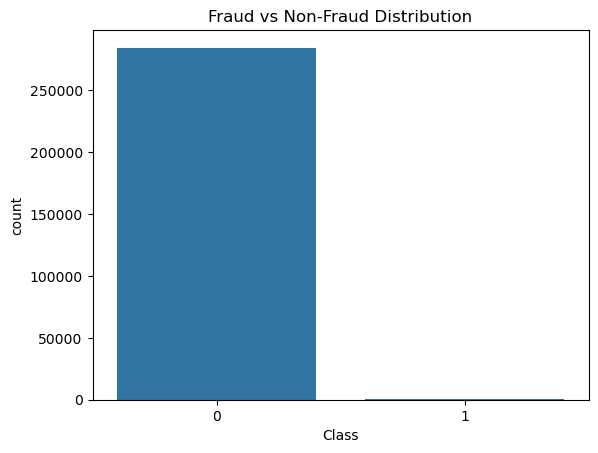

In [21]:
fraud_counts = df['Class'].value_counts(normalize=True) * 100
fraud_counts
sns.countplot(x='Class', data=df)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()

## Feature Scaling

In [24]:
scaler = StandardScaler()
df[['Time', 'Amount']] = scaler.fit_transform(df[['Time', 'Amount']])

## Feature Matrix & Target

In [26]:
X = df.drop('Class', axis=1)
y = df['Class']

## Train–Test Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

## Handle Class Imbalance using SMOTE

In [33]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())

Before SMOTE: Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


## Logistic Regression (Baseline Model)

In [36]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_smote, y_train_smote)

y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:,1]

## Evaluation

In [38]:
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

ROC-AUC: 0.9698482164390798


## Random Forest - Non Linear Lodel

In [40]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]



## Evaluation

In [43]:
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.82      0.83        98

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9747227182938454


## Confusion Matrix

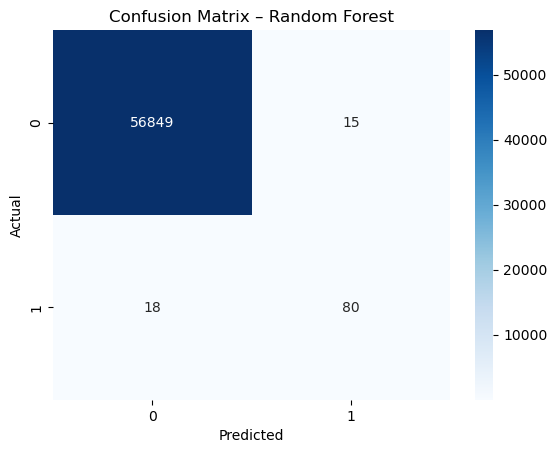

In [45]:
cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Random Forest")
plt.show()

## Precision–Recall Curve

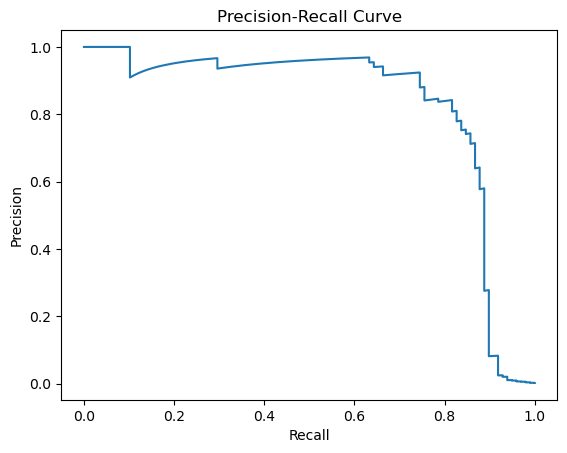

In [47]:
precision, recall, _ = precision_recall_curve(y_test, y_prob_rf)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

## Feature Importance

In [49]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance.head(10)

,Feature,Importance
14,V14,0.180785
4,V4,0.113965
10,V10,0.113478
12,V12,0.095413
17,V17,0.088191
3,V3,0.063343
11,V11,0.055855
16,V16,0.051470
2,V2,0.030112
7,V7,0.025183


## Business Interpretation

In [51]:
fraud_detected = sum((y_test == 1) & (y_pred_rf == 1))
fraud_missed = sum((y_test == 1) & (y_pred_rf == 0))

print(f"Frauds Detected: {fraud_detected}")
print(f"Frauds Missed: {fraud_missed}")

Frauds Detected: 80
Frauds Missed: 18


### Define Business Costs

In [62]:
COST_FALSE_NEGATIVE = 1000   # Fraud missed (big loss)
COST_FALSE_POSITIVE = 50     # Legit transaction blocked

### XGBoost

In [65]:
y_prob = rf.predict_proba(X_test)[:, 1]

### Threshold Optimization Code

In [69]:
thresholds = np.arange(0.01, 1.0, 0.01)

results = []

for threshold in thresholds:
    y_pred_thresh = (y_prob >= threshold).astype(int)
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_thresh).ravel()
    
    total_cost = (fn * COST_FALSE_NEGATIVE) + (fp * COST_FALSE_POSITIVE)
    
    results.append({
        'threshold': threshold,
        'false_positives': fp,
        'false_negatives': fn,
        'total_cost': total_cost
    })

results_df = pd.DataFrame(results)

### Visualize cost vs Threshold

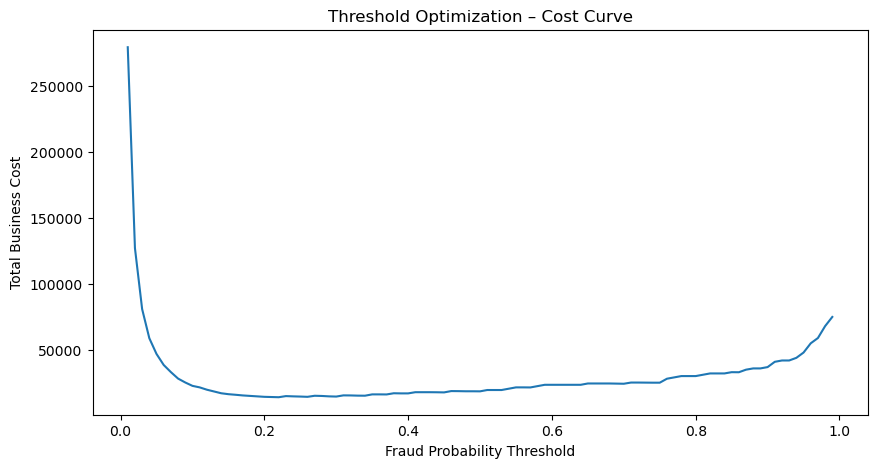

In [72]:
plt.figure(figsize=(10,5))
plt.plot(results_df['threshold'], results_df['total_cost'])
plt.xlabel("Fraud Probability Threshold")
plt.ylabel("Total Business Cost")
plt.title("Threshold Optimization – Cost Curve")
plt.show()

### Find Optimal Threshold

In [75]:
optimal_row = results_df.loc[results_df['total_cost'].idxmin()]
optimal_threshold = optimal_row['threshold']

optimal_row

threshold              0.22
false_positives       66.00
false_negatives       11.00
total_cost         14300.00
Name: 21, dtype: float64

### Apply Optimal Threshold

In [78]:
optimal_row = results_df.loc[results_df['total_cost'].idxmin()]
optimal_threshold = optimal_row['threshold']

optimal_row

threshold              0.22
false_positives       66.00
false_negatives       11.00
total_cost         14300.00
Name: 21, dtype: float64